The K-means clustering method is a popular unsupervised machine learning technique used for aggregating data points into distinct groups based on their similarity. When applied to time series data, k-means clustering can be used to classify time series into different groups based on their temporal patterns. In this case, each time series is represented as a vector of features. The elbow method or silhouette analysis can be used to determine the optimal number of groups for a given dataset.

In this exercise we will time series of Fraction of Transpirable Soil Water as a function of biological days (similar to growing degree days) that were obtained with the Simple Simulation Model. The goal is to classify the time series and inspect whether the soil moistuer paterns agree with the climate classification. The dataset has time series of the same length for locations across the U.S. Great Plains, so that we span a wide range of soil moisture regimes. You can learn more about this full study in Sciarresi et al. (2019). Note that this very analysis could be done without knowing the climate classification and with the intention of classifying each location according to the soil moisture pattern.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suppress warning from Kmeans in Windows
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv("../datasets/wheat_ftsw.csv")
df.head()


,climate_class,city,state,year,BD-14,BD-18,BD-22,BD-26,BD-31,BD-35,BD-39,BD-43,BD-47,BD-51,BD-55,BD-60,BD-64,BD-68,BD-72,yield
0,semi-arid,Akron,CO,1986,0.642,0.707,0.468,0.279,0.285,0.134,0.249,0.225,0.082,0.039,0.031,0.024,0.033,0.068,0.042,2952
1,semi-arid,Byers,CO,1989,0.461,0.486,0.500,0.330,0.130,0.062,0.025,0.092,0.039,0.044,0.031,0.010,0.003,0.007,0.002,1715
2,semi-arid,Lamar,CO,1992,0.796,0.675,0.582,0.395,0.278,0.163,0.155,0.159,0.111,0.157,0.080,0.028,0.034,0.086,0.096,3437
3,semi-arid,Sedgwick,CO,1996,0.775,0.821,0.761,0.523,0.289,0.136,0.059,0.088,0.157,0.201,0.150,0.206,0.126,0.108,0.117,4091
4,semi-arid,Colby,KS,1999,0.714,0.611,0.660,0.397,0.214,0.177,0.099,0.054,0.031,0.012,0.008,0.004,0.003,0.002,0.001,1619


In [3]:
# Inspect the number fo different climates
print(df['climate_class'].unique())


['semi-arid' 'dry-subhumid' 'moist-subhumid']


In [4]:
# Select columns for biological days only
X = df.iloc[:,4:-1].values

# Inspect shape
print(X.shape)


(75, 15)


In [5]:
# Select number of clusters
k = 3 # Same as climate classifications
groups = KMeans(n_clusters=k, random_state=0, n_init='auto').fit_predict(X)
print(groups)


[0 0 0 0 0 0 2 0 0 2 0 1 2 0 0 0 2 0 0 2 0 2 0 0 2 2 1 0 2 2 0 2 2 1 2 1 0
 2 1 2 1 2 0 1 2 1 0 2 2 2 1 2 1 0 2 2 1 1 1 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1
 1]


In [6]:
# Get cumulative biological days for plotting purposes
cbd = [float(col[3:]) for col in df.columns[4:-1]]
print(cbd)


[14.0, 18.0, 22.0, 26.0, 31.0, 35.0, 39.0, 43.0, 47.0, 51.0, 55.0, 60.0, 64.0, 68.0, 72.0]


In [7]:
# Add groups to DataFrame
df.insert(1,"Kgroup",groups)

# Examine df with new column
df.head(3)


,climate_class,Kgroup,city,state,year,BD-14,BD-18,BD-22,BD-26,BD-31,...,BD-39,BD-43,BD-47,BD-51,BD-55,BD-60,BD-64,BD-68,BD-72,yield
0,semi-arid,0,Akron,CO,1986,0.642,0.707,0.468,0.279,0.285,...,0.249,0.225,0.082,0.039,0.031,0.024,0.033,0.068,0.042,2952
1,semi-arid,0,Byers,CO,1989,0.461,0.486,0.500,0.330,0.130,...,0.025,0.092,0.039,0.044,0.031,0.010,0.003,0.007,0.002,1715
2,semi-arid,0,Lamar,CO,1992,0.796,0.675,0.582,0.395,0.278,...,0.155,0.159,0.111,0.157,0.080,0.028,0.034,0.086,0.096,3437


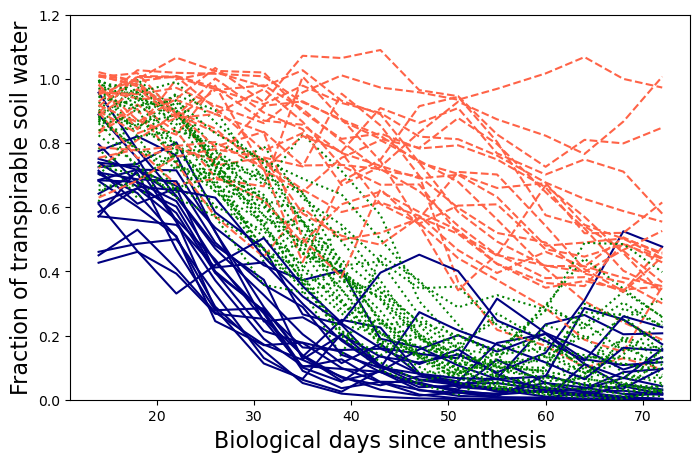

In [8]:
# Creaet figure
plt.figure(figsize=(8,5))

for i,g in enumerate(groups):
    if g == 0: 
        plt.plot(cbd, df.iloc[i,5:-1], linestyle='-', color='navy')
    elif g == 1: 
        plt.plot(cbd, df.iloc[i,5:-1], linestyle='--', color='tomato')
    elif g == 2: 
        plt.plot(cbd, df.iloc[i,5:-1], linestyle=':', color='green')

        
plt.xlabel('Biological days since anthesis', size=16)
plt.ylabel('Fraction of transpirable soil water', size=16)
plt.ylim(0,1.2)
plt.show()


In [17]:
# Examine matching of Kgroups with known climate classification according to Aridity Index
for i in range(df.shape[0]):
    print(df.loc[i,"city"],': ', df.loc[i,"climate_class"], df.loc[i,"Kgroup"])
    

Akron :  semi-arid 0
Byers :  semi-arid 0
Lamar :  semi-arid 0
Sedgwick :  semi-arid 0
Colby :  semi-arid 0
Dodge City :  semi-arid 0
Elkhart :  semi-arid 2
Garden City :  semi-arid 0
Goodland :  semi-arid 0
Liberal :  semi-arid 2
Ness City :  semi-arid 0
Oakley :  semi-arid 1
St. John :  semi-arid 2
Tribune :  semi-arid 0
Beaver :  semi-arid 0
Boise City :  semi-arid 0
Crosbyton :  semi-arid 2
Dalhart :  semi-arid 0
Dumas :  semi-arid 0
Haskell :  semi-arid 2
Hereford :  semi-arid 0
Muleshoe :  semi-arid 2
Perryton :  semi-arid 0
Plainview :  semi-arid 0
Quanah :  semi-arid 2
Ellsworth :  dry-subhumid 2
Ellsworth :  dry-subhumid 1
Great Bend :  dry-subhumid 0
Greensburg :  dry-subhumid 2
Kiowa :  dry-subhumid 2
Meade :  dry-subhumid 0
Medicine Lodge :  dry-subhumid 2
Norton :  dry-subhumid 2
Pratt :  dry-subhumid 1
Salina :  dry-subhumid 2
Scandia :  dry-subhumid 1
Smith Center :  dry-subhumid 0
Altus :  dry-subhumid 2
Alva :  dry-subhumid 1
Bessie :  dry-subhumid 2
Elk City :  dry-su

## References

Sciarresi, C., Patrignani, A., Soltani, A., Sinclair, T. and Lollato, R.P., 2019. Plant traits to increase winter wheat yield in semiarid and subhumid environments. Agronomy Journal, 111(4), pp.1728-1740.